# Approach 2: Gaussian Filtering on Model 2

In [65]:
import json

# Public libraries
from keras.models import model_from_json
from keras.optimizers import Adam
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random, os
from sklearn.metrics import accuracy_score

# Project
import config
import helper

# Examples of Gaussian Filtering

In [10]:
img="/home/pulkit/Downloads/GTSRB/Training/00002/00035_00024.ppm"
img=cv2.imread(img)
img_original=img

In [11]:
for i in range(0,3):
    img = cv2.GaussianBlur(img,(5,5),0)

Text(0.5, 1.0, 'Image after applying Gaussian Filtering')

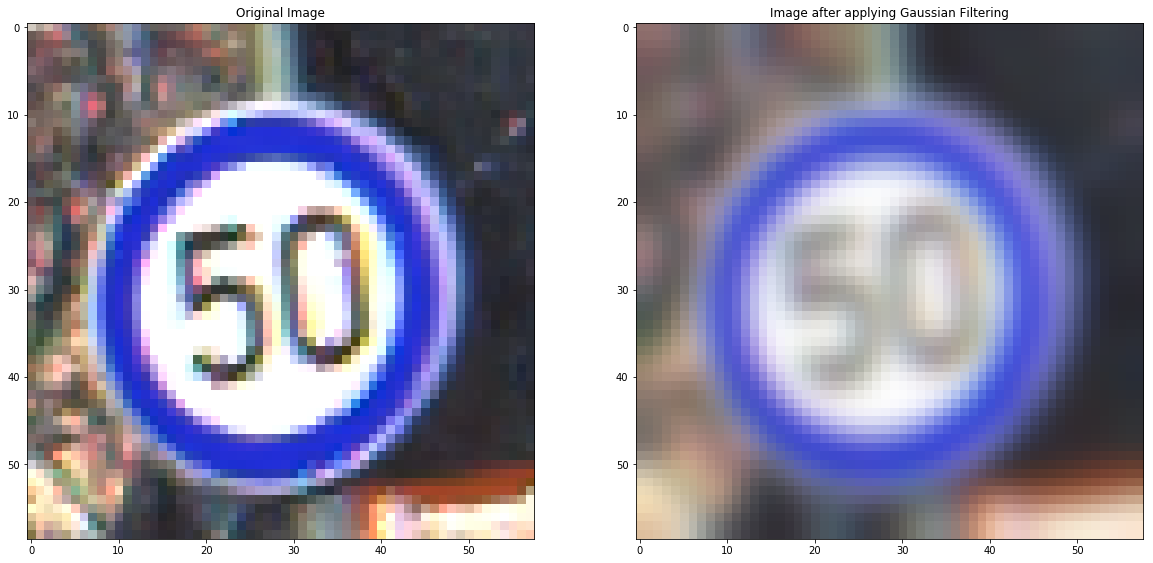

In [12]:
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].imshow(img_original)
axarr[0].set_title("Original Image")
axarr[1].imshow(img)
axarr[1].set_title("Image after applying Gaussian Filtering")

In [13]:
img="/home/pulkit/Downloads/GTSRB/Training/00003/00031_00022.ppm"
img=cv2.imread(img)
img_original=img

In [14]:
for i in range(0,3):
    img = cv2.GaussianBlur(img,(5,5),0)

Text(0.5, 1.0, 'Image after applying Gaussian Filtering')

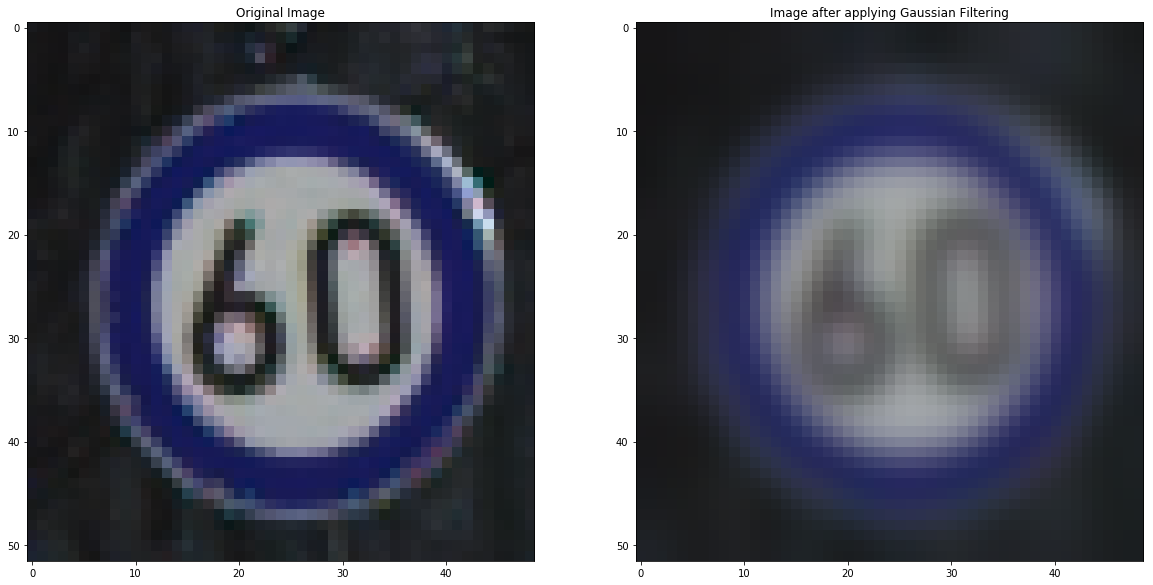

In [15]:
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].imshow(img_original)
axarr[0].set_title("Original Image")
axarr[1].imshow(img)
axarr[1].set_title("Image after applying Gaussian Filtering")

At this step, we will define a function fetch_data to fetch the test images and its corresponding labels.

In [61]:
def fetch_data():
    DATA_SET = 'test'  # {'test', 'train', 'valid'}

    # Load images and labels
    x, y = helper.load_data(DATA_SET)
    
    # getting 200 random images with their labels without duplicates
    
    img_test=randomList = random.sample(range(0, 12000),200)
    return img_test,x,y


Now, we will define a function which will apply Gaussian Blur function with a specified height and width of the 
kernel. The model predicts the label for every image. At last, an accuracy score is calculated.
Gaussian Blur is applied 3 times to fool the model, as it is very well trained.

In [62]:
def gausian_filter():
    model_file = config.MODEL_DEFINITION
    with open(model_file, 'r') as jfile:
        model = model_from_json(json.loads(jfile.read()))

        # Compile model and load weights
    model.compile(optimizer=Adam(), loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.load_weights(config.MODEL_WEIGHTS)
        
    
    y_true=[]              ## stores the true value of the images
    y_pred=[]              ## stores the predicted value of the images
    
    
    img_test,x,y=fetch_data()
    
    for i in range(0,200,1):
        img=x[img_test[i]]
        
        # Applying Gausian Filter for 3 times.
        for j in range(0,3):
            img = cv2.GaussianBlur(img,(5,5),0)
            
        # resizing the image for the model
        img.shape=(1,32,32,3)
        
        y_true.append(y[img_test[i]])
    
        print("****************************************************************************")
        print("The true label is-:", y[img_test[i]])
        prediction=model.predict_classes(img)
        
        print("The predicted label is-:",prediction)
        y_pred.append(prediction)
        
    print("****************************************************************************") 
    correct_percent=accuracy_score(y_true, y_pred)
    print("The accuracy score is ",correct_percent)

In [63]:
gausian_filter()

****************************************************************************
The true label is-: [38]
The predicted label is-: [38]
****************************************************************************
The true label is-: [39]
The predicted label is-: [39]
****************************************************************************
The true label is-: [11]
The predicted label is-: [11]
****************************************************************************
The true label is-: [5]
The predicted label is-: [15]
****************************************************************************
The true label is-: [3]
The predicted label is-: [15]
****************************************************************************
The true label is-: [11]
The predicted label is-: [30]
****************************************************************************
The true label is-: [29]
The predicted label is-: [20]
****************************************************************************
T

The predicted label is-: [25]
****************************************************************************
The true label is-: [13]
The predicted label is-: [13]
****************************************************************************
The true label is-: [28]
The predicted label is-: [28]
****************************************************************************
The true label is-: [10]
The predicted label is-: [10]
****************************************************************************
The true label is-: [4]
The predicted label is-: [40]
****************************************************************************
The true label is-: [35]
The predicted label is-: [35]
****************************************************************************
The true label is-: [8]
The predicted label is-: [8]
****************************************************************************
The true label is-: [4]
The predicted label is-: [4]
***************************************************

Conclusion-: Applying Gaussian Fitering decreases the prediction accuracy of the model from 95.5% to 78.5%. 
In order to further decresase the the prediction accuracy, we can apply the Gaussian Filtering once more on
already filtered image. Further applying Gaussian Filtering on the image will make the quality of 
the image so bad, that even the human eye will not be able to recognize it.

Note-: The quality of the image obtained after FGSM attack, is far superior than obtained by Gaussian Filter.